In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 


C:\Users\Kanika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Kanika\AppData\Local\Temp\ipykernel_8612\3177948322.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv("water_dataX.csv",encoding="latin")
data = data.drop(["STATION CODE","LOCATIONS","STATE"],axis = 1)

In [3]:
data.shape

(1991, 9)

In [4]:
data = data.iloc[0:1900, :]
data.shape

(1900, 9)

In [5]:
data.dtypes

Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [6]:
data=data.rename(columns={'D.O. (mg/l)':'do',                           #renaming the columns
                          'PH':'ph',
                          'CONDUCTIVITY (µmhos/cm)':'co',
                          'B.O.D. (mg/l)':'bod',
                          'NITRATENAN N+ NITRITENANN (mg/l)':'na',
                          'TOTAL COLIFORM (MPN/100ml)Mean':'tc',
                          'station':'station',
                          'location':'location',
                          'state':'state',
                          'Temp':'temp'})

In [7]:
data.drop(data.columns[[6,8]],axis=1,inplace=True)

In [8]:
columns_to_convert = ['tc', 'do', 'ph', 'co', 'bod', 'na']                    #converting the datatype of column to numrical
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# here error ='coerce' is used because if any value which cannot be converted to numeric is converted into NaN

In [9]:
data.isnull().sum()

temp      0
do       30
ph        7
co       24
bod      42
na      189
tc      130
dtype: int64

In [10]:
data.columns

Index(['temp', 'do', 'ph', 'co', 'bod', 'na', 'tc'], dtype='object')

In [11]:
data.dropna(inplace =True)

In [12]:
data.isnull().sum()

temp    0
do      0
ph      0
co      0
bod     0
na      0
tc      0
dtype: int64

In [13]:
data_new = data.copy
data_new = pd.DataFrame(data)
data_new

,temp,do,ph,co,bod,na,tc
1,29.8,5.7,7.20,189.0,2.000,0.200,8391.0
2,29.5,6.3,6.90,179.0,1.700,0.100,5330.0
3,29.7,5.8,6.90,64.0,3.800,0.500,8443.0
4,29.5,5.8,7.30,83.0,1.900,0.400,5500.0
5,30,5.5,7.40,81.0,1.500,0.100,4049.0
...,...,...,...,...,...,...,...
1894,28,7.1,6.94,95.8,0.943,0.151,26.0
1895,27,7.4,7.00,88.5,0.977,0.186,105.0
1896,NAN,6.6,7.81,603.2,2.675,0.263,191.0
1897,28,6.6,7.49,571.5,2.091,0.256,273.0


C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

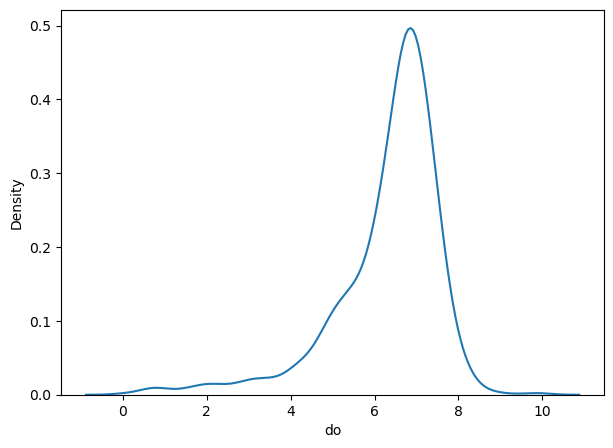

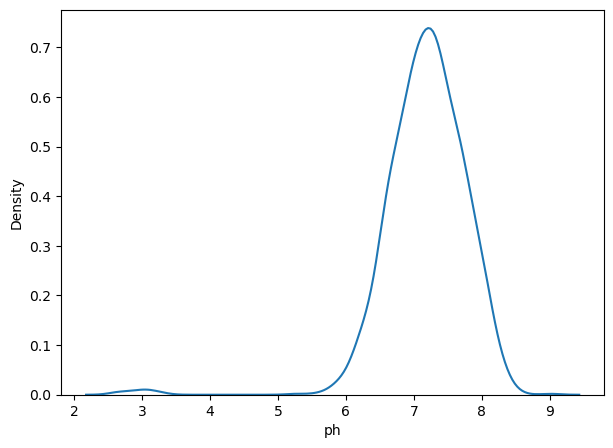

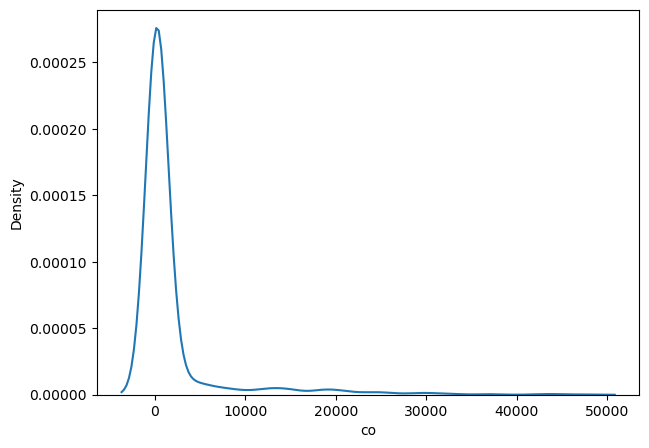

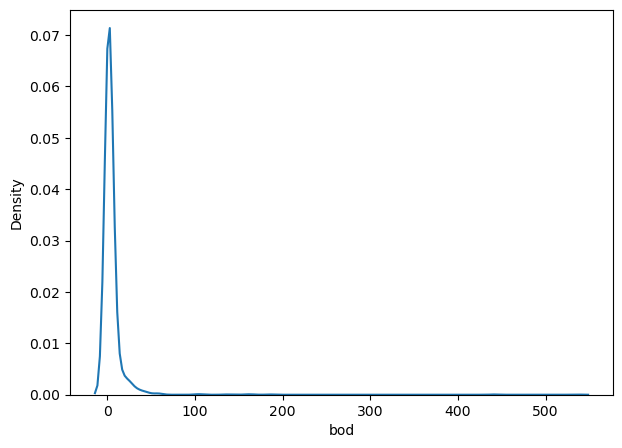

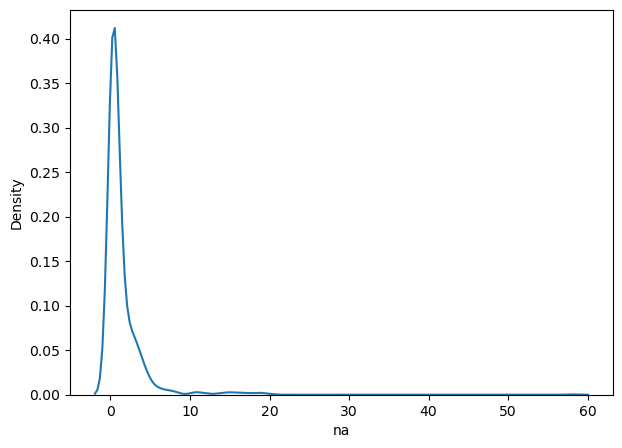

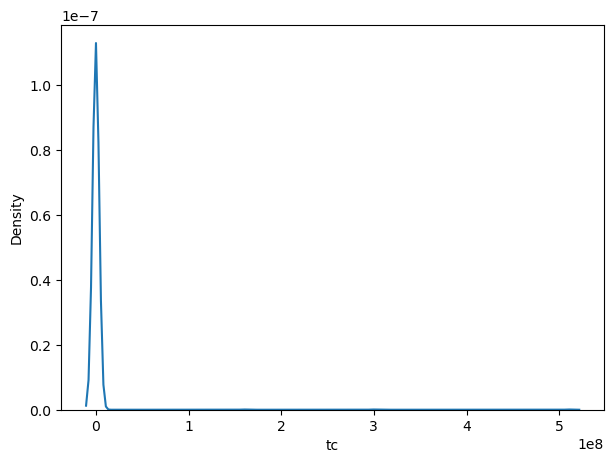

In [14]:
# PLotting PDFs of all the numeric attributes in the dataset
import matplotlib.pyplot as plt
data_num_final = data.select_dtypes(exclude="object")

def plot_kde(data):
    n_col = data.shape[1]
    for index in range(n_col):
        col_index = data.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=data, x=col_index.name)
        
plot_kde(data_num_final)

In [15]:
upper_limit = data["ph"].quantile(0.99)
lower_limit=data["ph"].quantile(0.01)

In [16]:
import numpy as np
data["ph"]=np.where(data["ph"]>=11,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the median value then .
                   7.3,                                            # 7.3 is median
                   np.where(data["ph"]<=lower_limit,                   #ideal value of ph is 6.5- 9.5
                           7.3,
                           data["ph"]))

In [17]:
lower_limit=data["co"].quantile(0.01)
upper_limit=data["co"].quantile(0.99)
data["co"]=np.where(data["co"]>=1500,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   183,
                   np.where(data["co"]<=50,                            #ideal value of c0 to be drinkable is 100-800
                           183,
                           data["co"]))

In [18]:
upper_limit=data["bod"].quantile(0.99)
lower_limit=data["bod"].quantile(0.01)
import numpy as np
data["bod"]=np.where(data["bod"]>=6,                                    # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   1.89, 
                   np.where(data["bod"]<=lower_limit,                   #ideal value of bod is less than 5
                           1.89,
                           data["bod"]))

In [19]:
upper_limit=data["na"].quantile(0.99)
lower_limit=data["na"].quantile(0.01)
import numpy as np
data["na"]=np.where(data["na"]>1,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   0.516,
                   np.where(data["na"]<=lower_limit,
                           0.516,
                           data["na"]))

In [20]:
upper_limit=data["tc"].quantile(0.99)
lower_limit=data["tc"].quantile(0.01)
import numpy as np
data["tc"]=np.where(data["tc"]>5000,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   468,
                   np.where(data["tc"]<=lower_limit,
                           468,
                           data["tc"]))

In [21]:
data.drop(["temp"], axis =1, inplace = True)

In [22]:
data

,do,ph,co,bod,na,tc
1,5.7,7.20,189.0,2.000,0.200,468.0
2,6.3,6.90,179.0,1.700,0.100,468.0
3,5.8,6.90,64.0,3.800,0.500,468.0
4,5.8,7.30,83.0,1.900,0.400,468.0
5,5.5,7.40,81.0,1.500,0.100,4049.0
...,...,...,...,...,...,...
1894,7.1,6.94,95.8,0.943,0.151,26.0
1895,7.4,7.00,88.5,0.977,0.186,105.0
1896,6.6,7.81,603.2,2.675,0.263,191.0
1897,6.6,7.49,571.5,2.091,0.256,273.0


C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

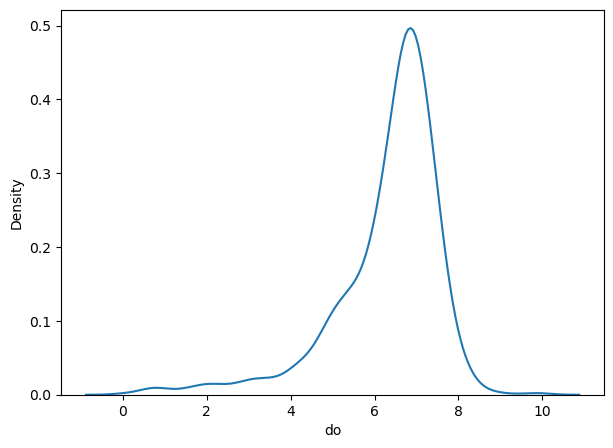

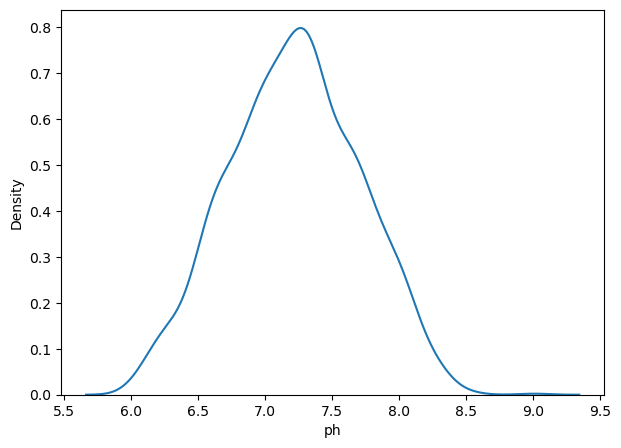

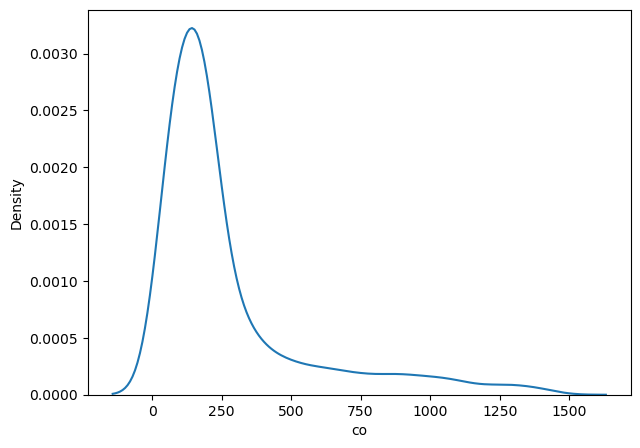

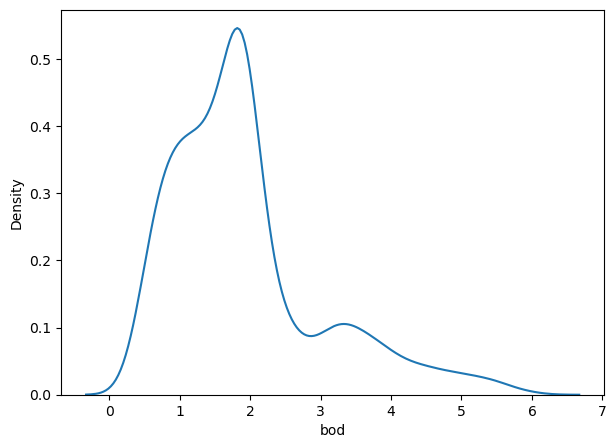

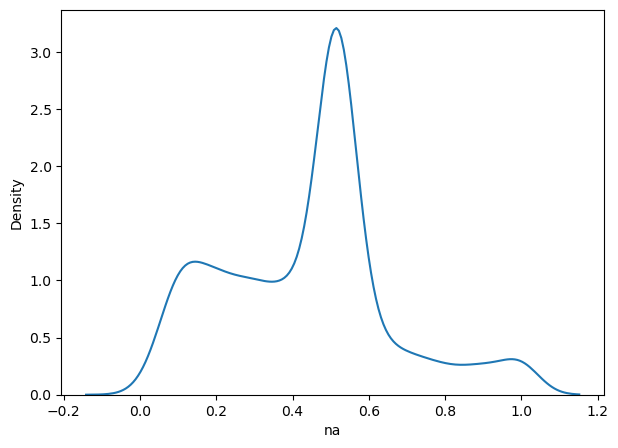

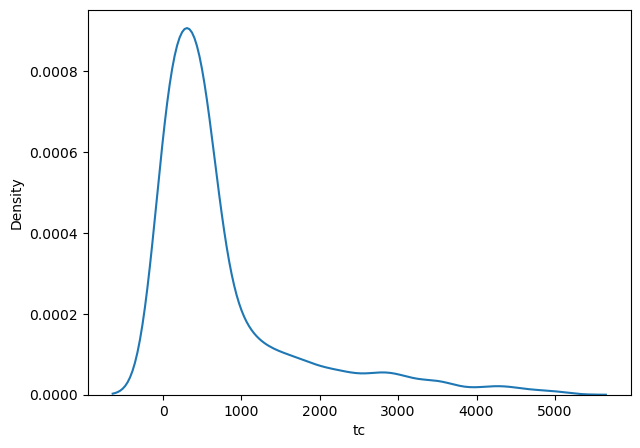

In [23]:
import matplotlib.pyplot as plt
def plot_kde(data):
    n_col = data.shape[1]
    for index in range(n_col):
        col_index = data.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=data, x=col_index.name)
        
plot_kde(data)

In [24]:
data.isnull().sum()

do     0
ph     0
co     0
bod    0
na     0
tc     0
dtype: int64

# Hypothesis Testing

In [25]:
data_new.drop(["temp"], axis=1, inplace = True)

In [26]:
import pandas as pd
from scipy import stats

# Assuming you have two DataFrames named df_before and df_after
# Replace 'df_before' and 'df_after' with your actual DataFrame variables
data = data.apply(pd.to_numeric, errors='coerce')
data_new = data_new.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)
data_new.dropna(inplace=True)
# Get a list of column names from the first DataFrame
columns_before = data_new.columns

# Get a list of column names from the second DataFrame
columns_after = data.columns

# Perform t-tests for corresponding pairs of columns from the two DataFrames
for col_before, col_after in zip(columns_before, columns_after):
    # Extract data from DataFrames
    data_before = data_new[col_before].values.astype(float)
    data_after = data[col_after].values.astype(float)
    min_length = min(len(data_before), len(data_after))
    data_before = data_before[:min_length]
    data_after = data_after[:min_length]
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_rel(data_before, data_after)
    
    # Print results
    print(f"T-test between '{col_before}' in df_before and '{col_after}' in df_after:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in means between the two columns.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in means between the two columns.")
    print()


T-test between 'do' in df_before and 'do' in df_after:
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference in means between the two columns.

T-test between 'ph' in df_before and 'ph' in df_after:
T-statistic: -4.312138265028685
P-value: 1.7160810025793198e-05
Reject the null hypothesis. There is a significant difference in means between the two columns.

T-test between 'co' in df_before and 'co' in df_after:
T-statistic: 11.785029955975737
P-value: 8.51979843988401e-31
Reject the null hypothesis. There is a significant difference in means between the two columns.

T-test between 'bod' in df_before and 'bod' in df_after:
T-statistic: 6.511889578448821
P-value: 9.922458680363199e-11
Reject the null hypothesis. There is a significant difference in means between the two columns.

T-test between 'na' in df_before and 'na' in df_after:
T-statistic: 13.89349293814599
P-value: 1.6546386012701978e-41
Reject the null hypothesis. There is a signif

# creating qi

In [27]:
# qdo = (x)/(standard)*100
data["qdo"]=data.do.apply(lambda x: (x/10)*100)

In [28]:
data["qph"]=data.ph.apply(lambda x: (x/8.5)*100)

In [29]:
data["qco"]=data.co.apply(lambda x: (x/1000)*100)

In [30]:
data["qbod"]=data.bod.apply(lambda x: (x/5)*100)

In [31]:
data["qna"]=data.na.apply(lambda x: (x/45)*100)

In [32]:
data["qtc"]=data.tc.apply(lambda x: (x/1000)*100)

In [33]:
data

,do,ph,co,bod,na,tc,qdo,qph,qco,qbod,qna,qtc
1,5.7,7.20,189.0,2.000,0.200,468.0,57.0,84.705882,18.90,40.00,0.444444,46.8
2,6.3,6.90,179.0,1.700,0.100,468.0,63.0,81.176471,17.90,34.00,0.222222,46.8
3,5.8,6.90,64.0,3.800,0.500,468.0,58.0,81.176471,6.40,76.00,1.111111,46.8
4,5.8,7.30,83.0,1.900,0.400,468.0,58.0,85.882353,8.30,38.00,0.888889,46.8
5,5.5,7.40,81.0,1.500,0.100,4049.0,55.0,87.058824,8.10,30.00,0.222222,404.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1894,7.1,6.94,95.8,0.943,0.151,26.0,71.0,81.647059,9.58,18.86,0.335556,2.6
1895,7.4,7.00,88.5,0.977,0.186,105.0,74.0,82.352941,8.85,19.54,0.413333,10.5
1896,6.6,7.81,603.2,2.675,0.263,191.0,66.0,91.882353,60.32,53.50,0.584444,19.1
1897,6.6,7.49,571.5,2.091,0.256,273.0,66.0,88.117647,57.15,41.82,0.568889,27.3


In [34]:
data["wph"]=data.qph*0.2604                        # these weights are pre assigned by 
data["wdo"]=data.qdo*0.2213
data["wbod"]=data.qbod*0.4426
data["wco"]=data.qco*0.0022
data["wna"]=data.qna*0.0492
data["wtc"]=data.qtc*0.0022
data["wqi"]=data.wph + data.wdo + data.wbod + data.wco + data.wna + data.wtc

In [35]:
data

,do,ph,co,bod,na,tc,qdo,qph,qco,qbod,qna,qtc,wph,wdo,wbod,wco,wna,wtc,wqi
1,5.7,7.20,189.0,2.000,0.200,468.0,57.0,84.705882,18.90,40.00,0.444444,46.8,22.057412,12.6141,17.704000,0.041580,0.021867,0.10296,52.541918
2,6.3,6.90,179.0,1.700,0.100,468.0,63.0,81.176471,17.90,34.00,0.222222,46.8,21.138353,13.9419,15.048400,0.039380,0.010933,0.10296,50.281926
3,5.8,6.90,64.0,3.800,0.500,468.0,58.0,81.176471,6.40,76.00,1.111111,46.8,21.138353,12.8354,33.637600,0.014080,0.054667,0.10296,67.783060
4,5.8,7.30,83.0,1.900,0.400,468.0,58.0,85.882353,8.30,38.00,0.888889,46.8,22.363765,12.8354,16.818800,0.018260,0.043733,0.10296,52.182918
5,5.5,7.40,81.0,1.500,0.100,4049.0,55.0,87.058824,8.10,30.00,0.222222,404.9,22.670118,12.1715,13.278000,0.017820,0.010933,0.89078,49.039151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,7.1,6.94,95.8,0.943,0.151,26.0,71.0,81.647059,9.58,18.86,0.335556,2.6,21.260894,15.7123,8.347436,0.021076,0.016509,0.00572,45.363935
1895,7.4,7.00,88.5,0.977,0.186,105.0,74.0,82.352941,8.85,19.54,0.413333,10.5,21.444706,16.3762,8.648404,0.019470,0.020336,0.02310,46.532216
1896,6.6,7.81,603.2,2.675,0.263,191.0,66.0,91.882353,60.32,53.50,0.584444,19.1,23.926165,14.6058,23.679100,0.132704,0.028755,0.04202,62.414543
1897,6.6,7.49,571.5,2.091,0.256,273.0,66.0,88.117647,57.15,41.82,0.568889,27.3,22.945835,14.6058,18.509532,0.125730,0.027989,0.06006,56.274947


In [36]:
data.describe()

,do,ph,co,bod,na,tc,qdo,qph,qco,qbod,qna,qtc,wph,wdo,wbod,wco,wna,wtc,wqi
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,6.314566,7.219908,272.609309,1.915747,0.439431,752.077527,63.145662,84.940098,27.260931,38.314940,0.976514,75.207753,22.118402,13.974135,16.958193,0.059974,0.048044,0.165457,53.324205
std,1.284007,0.488170,280.516749,1.079654,0.220638,946.923990,12.840065,5.743182,28.051675,21.593077,0.490306,94.692399,1.495524,2.841506,9.557096,0.061714,0.024123,0.208323,10.281449
min,0.000000,6.000000,51.000000,0.414000,0.010000,7.000000,0.000000,70.588235,5.100000,8.280000,0.022222,0.700000,18.381176,0.000000,3.664728,0.011220,0.001093,0.001540,34.347706
25%,5.900000,6.900000,100.000000,1.100000,0.265000,142.000000,59.000000,81.176471,10.000000,22.000000,0.588889,14.200000,21.138353,13.056700,9.737200,0.022000,0.028973,0.031240,46.227628
50%,6.700000,7.200000,183.000000,1.800000,0.516000,468.000000,67.000000,84.705882,18.300000,36.000000,1.146667,46.800000,22.057412,14.827100,15.933600,0.040260,0.056416,0.102960,50.842875
75%,7.100000,7.600000,296.000000,2.200000,0.516000,813.000000,71.000000,89.411765,29.600000,44.000000,1.146667,81.300000,23.282824,15.712300,19.474400,0.065120,0.056416,0.178860,56.986982
max,10.000000,9.010000,1439.000000,5.930000,1.000000,5000.000000,100.000000,106.000000,143.900000,118.600000,2.222222,500.000000,27.602400,22.130000,52.492360,0.316580,0.109333,1.100000,88.224741


In [37]:
data["target"]=data.wqi.apply(lambda x: (1 if (75>=x>=0)
                                    else(0)))

In [38]:
data

,do,ph,co,bod,na,tc,qdo,qph,qco,qbod,qna,qtc,wph,wdo,wbod,wco,wna,wtc,wqi,target
1,5.7,7.20,189.0,2.000,0.200,468.0,57.0,84.705882,18.90,40.00,0.444444,46.8,22.057412,12.6141,17.704000,0.041580,0.021867,0.10296,52.541918,1
2,6.3,6.90,179.0,1.700,0.100,468.0,63.0,81.176471,17.90,34.00,0.222222,46.8,21.138353,13.9419,15.048400,0.039380,0.010933,0.10296,50.281926,1
3,5.8,6.90,64.0,3.800,0.500,468.0,58.0,81.176471,6.40,76.00,1.111111,46.8,21.138353,12.8354,33.637600,0.014080,0.054667,0.10296,67.783060,1
4,5.8,7.30,83.0,1.900,0.400,468.0,58.0,85.882353,8.30,38.00,0.888889,46.8,22.363765,12.8354,16.818800,0.018260,0.043733,0.10296,52.182918,1
5,5.5,7.40,81.0,1.500,0.100,4049.0,55.0,87.058824,8.10,30.00,0.222222,404.9,22.670118,12.1715,13.278000,0.017820,0.010933,0.89078,49.039151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,7.1,6.94,95.8,0.943,0.151,26.0,71.0,81.647059,9.58,18.86,0.335556,2.6,21.260894,15.7123,8.347436,0.021076,0.016509,0.00572,45.363935,1
1895,7.4,7.00,88.5,0.977,0.186,105.0,74.0,82.352941,8.85,19.54,0.413333,10.5,21.444706,16.3762,8.648404,0.019470,0.020336,0.02310,46.532216,1
1896,6.6,7.81,603.2,2.675,0.263,191.0,66.0,91.882353,60.32,53.50,0.584444,19.1,23.926165,14.6058,23.679100,0.132704,0.028755,0.04202,62.414543,1
1897,6.6,7.49,571.5,2.091,0.256,273.0,66.0,88.117647,57.15,41.82,0.568889,27.3,22.945835,14.6058,18.509532,0.125730,0.027989,0.06006,56.274947,1


In [39]:
data["target"].value_counts()

target
1    1511
0      82
Name: count, dtype: int64

# Models

In [41]:
data1 = data[["wph", "wdo", "wbod", "wco", "wna", "wtc"]]
target = data["target"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rf5= RandomForestClassifier(n_estimators=10, random_state=0)
rf5.fit(x_train,y_train)
y_pred=rf5.predict(x_test)
accuracy_rf_5 = rf5.score(x_test,y_test)
accuracy_rf_5

1.0

# Applying SMOTE for handling imbalanced data

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1593, random_state=10)

print('Original dataset shape %s' % Counter(y))


# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data1, target)

Original dataset shape Counter({1: 1433, 0: 160})


In [44]:
X_resampled = pd.DataFrame(X_resampled)

In [90]:
y_resampled.value_counts()

target
1    1511
0    1511
Name: count, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# GRIDSEARCH CV

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
models = {
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
           "n_estimators": [10] 
        } 
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params":{
            "n_neighbors": [3]
        }
    },
    "XGBOOST":{
        "model": XGBClassifier(),
        "params":{
            "n_estimators":[10]
        }
    }
}

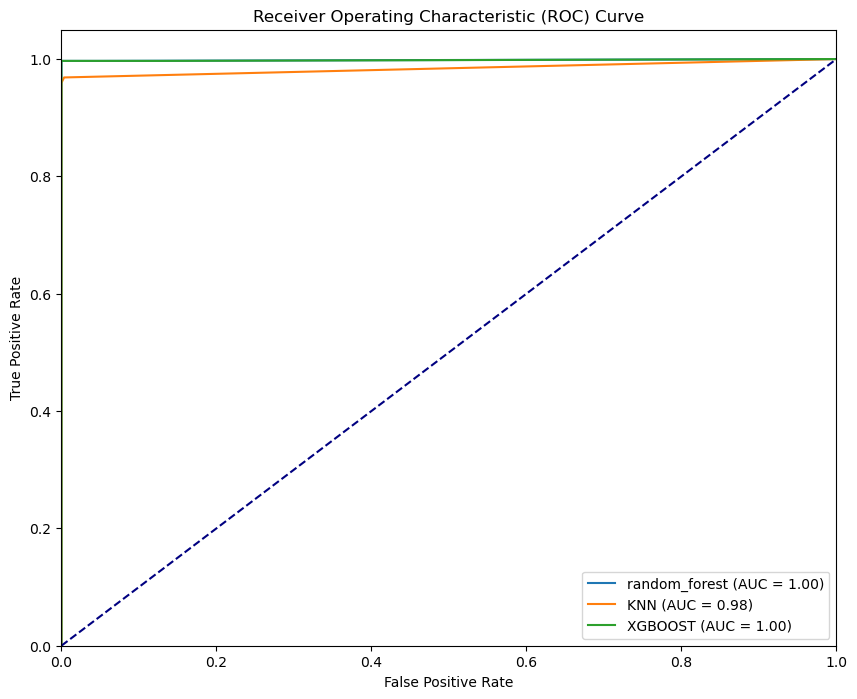

[{'model': 'random_forest',
  'best_score': 0.996691648272676,
  'precision': 0.9967171717171718,
  'recall': 0.996694214876033,
  'f1_score': 0.996694776308214,
  'sensitivity': 0.9937304075235109,
  'specificity': 1.0},
 {'model': 'KNN',
  'best_score': 0.9884186301182348,
  'precision': 0.9794466403162055,
  'recall': 0.9785123966942149,
  'f1_score': 0.9785276767676768,
  'sensitivity': 0.9592476489028213,
  'specificity': 1.0},
 {'model': 'XGBOOST',
  'best_score': 0.9983462519035641,
  'precision': 0.9950927964768795,
  'recall': 0.9950413223140496,
  'f1_score': 0.9950425445831127,
  'sensitivity': 0.9905956112852664,
  'specificity': 1.0}]

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)
sc=StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

score=[]
plt.figure(figsize=(10, 8))
for model_name, mp in models.items():
    clf = GridSearchCV(mp["model"], mp["params"])
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_score = clf.predict_proba(x_test)[:, 1]
    cm = confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp = cm.ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    score.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "sensitivity" : sensitivity,
        "specificity" : specificity
    })
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

score

In [69]:
predicted_labels = rf5.predict(x_test)

# Create a DataFrame with the test data and the predicted and true labels
df_results = pd.DataFrame({'True_Label': y_test, 'Predicted_Label': predicted_labels})

# Add a column indicating whether the prediction was correct or not
df_results['Correct_Prediction'] = df_results['True_Label'] == df_results['Predicted_Label']

# Filter out the misclassified instances
df_wrong_predictions = df_results[df_results['Correct_Prediction'] == False]

# Display the DataFrame of wrong predictions
print("DataFrame of Wrong Predictions:")
print(df_wrong_predictions)

DataFrame of Wrong Predictions:
      True_Label  Predicted_Label  Correct_Prediction
1523           1                0               False
1417           1                0               False
910            1                0               False


# Cross Validation

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your features stored in X and target variable in y

# Initialize your classifier
rf_classifier = RandomForestClassifier()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=kf, scoring='accuracy')

# Print the results
print("Cross-validation Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))


Cross-validation Accuracy: 0.9957 (+/- 0.0071)
